In [17]:
import sys
import json
from enum import Enum
import matplotlib.pyplot as plt
import random
print(sys.version)

3.11.3 (main, Apr  7 2023, 20:13:31) [Clang 14.0.0 (clang-1400.0.29.202)]


In [18]:
deck=json.load(open("DietenmeierUnoCards.json"))
deck

{'1': {'red': 4, 'green': 4, 'blue': 2, 'yellow': 4, 'all': 0},
 '2': {'red': 3, 'green': 4, 'blue': 2, 'yellow': 4, 'all': 0},
 '3': {'red': 3, 'green': 4, 'blue': 4, 'yellow': 3, 'all': 0},
 '4': {'red': 4, 'green': 3, 'blue': 4, 'yellow': 4, 'all': 0},
 '5': {'red': 4, 'green': 3, 'blue': 3, 'yellow': 2, 'all': 0},
 '6': {'red': 3, 'green': 3, 'blue': 2, 'yellow': 2, 'all': 0},
 '7': {'red': 3, 'green': 4, 'blue': 4, 'yellow': 4, 'all': 0},
 '8': {'red': 4, 'green': 4, 'blue': 4, 'yellow': 4, 'all': 0},
 '9': {'red': 4, 'green': 4, 'blue': 4, 'yellow': 3, 'all': 0},
 '0': {'red': 1, 'green': 2, 'blue': 1, 'yellow': 2, 'all': 0},
 'skip': {'red': 4, 'green': 4, 'blue': 3, 'yellow': 3, 'all': 0},
 'draw2': {'red': 3, 'green': 3, 'blue': 4, 'yellow': 2, 'all': 0},
 'reverse': {'red': 2, 'green': 4, 'blue': 4, 'yellow': 4, 'all': 0},
 'wild': {'red': 0, 'green': 0, 'blue': 0, 'yellow': 0, 'all': 5},
 'wild draw4': {'red': 0, 'green': 0, 'blue': 0, 'yellow': 0, 'all': 8}}

SUM: 183


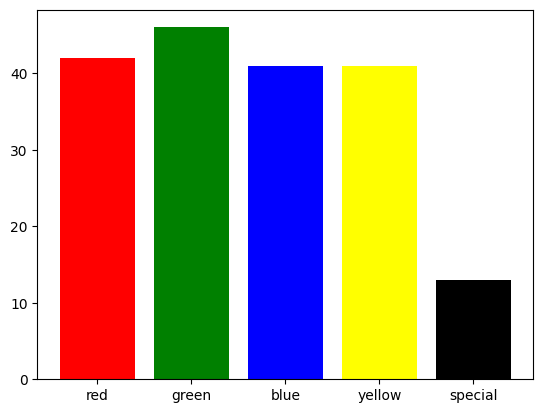

In [19]:
class Color(Enum):
    RED="red"
    GREEN="green"
    BLUE="blue"
    YELLOW="yellow"
    ALL="all"
    
allCardCount=0
cardCount={
Color.RED:0,Color.GREEN:0,Color.BLUE:0,Color.YELLOW:0,Color.ALL:0}

for key in deck:
    for color in Color:
        cardCount[color]+=deck[key][color.value]
        allCardCount+=deck[key][color.value]

cardCount

x=[]
for key in cardCount.keys():
    if key==color.ALL:
        x.append('special')
    else:
        x.append(key.value)
y=cardCount.values()
plt.bar(x=x,height=y,color=['red','green','blue','yellow','black'])
print(f"SUM: {allCardCount}")

In [63]:
# house rule simulation

class CardName(Enum):
    ZERO=0
    ONE=1
    TWO=2
    THREE=3
    FOUR=4
    FIVE=5
    SIX=6
    SEVEN=7
    EIGHT=8
    NINE=9
    SKIP=10
    DRAW_2=11
    REVERSE=12
    WILD=13
    WILD_DRAW_4=14

class Card:
    def __init__(s, name:CardName,color:Color):
        s.name = name
        s.color=color
        
    @staticmethod
    def jsonCardToCard(name:str,color:Color):
        cardName=None
        match name:
            case "0":
                cardName=CardName.ZERO
            case "1":
                cardName=CardName.ONE
            case "2":
                cardName=CardName.TWO
            case "3":
                cardName=CardName.THREE
            case "4":
                cardName=CardName.FOUR
            case "5":
                cardName=CardName.FIVE
            case "6":
                cardName=CardName.SIX
            case "7":
                cardName=CardName.SEVEN
            case "8":
                cardName=CardName.EIGHT
            case "9":
                cardName=CardName.NINE
            case "skip":
                cardName=CardName.SKIP
            case "draw2":
                cardName=CardName.DRAW_2
            case "reverse":
                cardName=CardName.REVERSE
            case "wild":
                cardName=CardName.WILD
            case "wild draw4":
                cardName=CardName.WILD_DRAW_4
            case _:
                raise ValueError(f"unknown JSON Card name: {name}") 
        return Card(cardName,color)

    def __str__(s):
        return f"{s.name} - {s.color}"
        

class Deck:
    def __init__(s):
        s.cards=[]
        pass
    def addCardsFromJson(s,json):
        for key in json:
            for color in Color:
                for i in range(json[key][color.value]):
                    s.cards.append(Card.jsonCardToCard(key,color))
    def shuffle(s):
        random.shuffle(s.cards)
    def drawCards(s,n:int)-> list:
        ret=[]
        for i in range(n):
            ret.append(s.cards.pop())
        return ret
    def addCards(s,cards):
        s.cards.extend(cards)
    def __str__(s):
        ret=""
        for card in s.cards:
            ret+=str(card)
            ret+="\n"
        return ret

class Player:
    def __init__(s, name:str,cards):
        s.name = name

        s.cards=cards
    
    def __str__(s):
        return f"{s.name} - {len(s.cards)}"

class Game:
    def __init__(s,deck,playerCount,startCardCount):
        s.actions=0

        s.stack=Deck()
        s.stack.addCardsFromJson(deck)
        s.stack.shuffle()
        
        s.stacker=Deck()

        s.players=[]
        for i in range(playerCount):
            s.players.append(Player(f"player {i}",s.stack.drawCards(startCardCount)))
    
    def __str__(s):
        ret=f"playerCount: {len(s.players)}\n"
        ret+=f"stackCount: {len(s.stack.cards)}\n"
        ret+=f"stackerCount: {len(s.stacker.cards)}\n"
        ret+=f"actions: {s.actions}\n"
        for player in s.players:
            ret+=str(player)+"\n"
        return ret




game=Game(deck,8,7)
print(game)





playerCount: 8
stackCount: 127
stackerCount: 0
actions: 0
player 0 - 7
player 1 - 7
player 2 - 7
player 3 - 7
player 4 - 7
player 5 - 7
player 6 - 7
player 7 - 7

